In [1]:
import numpy as np
import pandas as pd
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import math
from scipy.stats import gaussian_kde

In [2]:
def find_models(NMR_structs, list_of_RMSDs):
    x = np.array(list_of_RMSDs)
    loc = list(np.where(x == min(x)))
    print('AF model: ' + str(math.floor(loc.pop()/NMR_structs)))
    loc = list(np.where(x == min(x)))
    print('NMR model: ' + str(loc.pop()%NMR_structs))

In [3]:
peptides = pd.read_excel('new_peptide_set_EFM_sorted_no_duplicates.xlsx')

In [4]:
peps = pd.DataFrame()
peps['ID'] = peptides['Name '].dropna()
peps['start'] =  [int(i.split('-')[0]) for i in peptides['Structured Region for RMSD calculation'].dropna()]
peps['end'] =  [int(i.split('-')[1]) for i in peptides['Structured Region for RMSD calculation'].dropna()]
peps['len'] = peps['end'] - peps['start']
peps.set_index('ID', inplace=True)

## List of all models by catagory

In [5]:
#OG list
AH_MP_ids = ['6X7I','1MP6','2MC7','1A11','1ALE','1ALF','1B9Q','1BM4','1BMX','1CFG','1DEP','1DJF','1EMZ','1FW5','1HO2','1HOD','1HOF','1JDM','1KDL','1LBJ','1LYP','1M25','1MOT','1O53','1ODP','1OEG','1P82','1PLP','1QG9','1R7D','1RKL','1SKH','1SPF','1T5Q','1V4Z','1VTP','1XC0','1XOO','1XOP','1Y32','1Z2T','1Z65','1ZRV','2AP7','2B0Y','2B19','2DCI','2DTB','2FXY','2FXZ','2G9L','2G9P','2GD3','2HN8','2JMY','2JOS','2JPK','2JTW','2JUI','2JXF','2K10','2K44','2K58','2K59','2K6O','2K8J','2K98','2KDR','2KEH','2KFE','2KGN','2KHF','2KI9','2KIT','2KJN','2KNS','2KV5','2KWZ','2KZQ','2L36','2L4G','2L5R','2L63','2L77','2LAT','2LBG','2LCM','2LIF','2LMF','2LQY','2LUG','2LUV','2LX0','2LZP','2LZQ','2M0H','2M0W','2M8M', '2MCE','2ME1','2MG1','2MG2','2MHW','2MJ2','2MLU','2MMM','2MKB','2MUA','2MUE','2MVH','2MVJ','2MWT','2N1C','2N1P','2N58','2N6M','2N92','2N9C','2NCS','2NCU','2NCW','2NCX','2NCY','2NR1','2OJM','2OJN','2OJO','2PCO','2PV6','2RLH','2RLW','2RMG','2RMH','2RMY','2RQ2','2RRH','3LEU','3MRA','4B19','5H2S','5I4G','5LBJ','5NDA','5UJQ','5UJR','5XDJ','5Y22','5Z1Y','6A5J','6A8Y','6AHZ','6B3U','6BJF','6CFA','6CSK','6CSZ','6CT1','6CT4','6DST','6FS5','6GIF','6GIG','6GNZ','6GO0','6GS9','6HN9','6HZ2','6IHA','6MBM','6RRL','6RRO','6TWG','6VLA','6YHF','7ASY','7AT7','7ATB','7B2F','7BX2','7CK5','7DEH','7L83','7NS1','7OVZ','7P4X','7ZBS','1HLL']
AH_SL_ids = ['1AMB','1BY0','1DSK','1DTC','1FVY','1MF6','1Q2F','1VD7','1VD8','1VD9','1VDA','1W1N','1WN4','1WN8','1WNK','1WNM','1WNN','1YYB','1ZWD','2BN6','2GP8','2I9M','2IV5','2IV6','2KJM','2KPB','2LMA','2LQ0','2LQ1','2LQ2','2M1A','2M3F','2MRW','2MU6','2MU7','2MU9','2MUJ','2OVN','2PPZ','5TX8','6R2X']
BHPIN_ids = ['1K43', '1B1V','1BQF','1E0L','1E0M','1E0N','1EGT','1FGD','1FGE','1G04','1HRL','1I6C',  '1LFC','1NIZ','1TMR','1U0P','1U6V','1V28','2DJ9','2DJC','2EQH','2ESZ','2EVQ','2JN5','2JNI','2JQW','2JSB','2L07','2M9E','2M9I','2MDL','2MMT','2MMW','2MW3','2MW9','2MWA','2MWB','2MWD','2MWE','2MWF','2N4R','2N4S','2N4T','2N4U','2N4V','2N4W','2N68','2OP7','2ORU','2RT4','5KKM','5M9U','5XO3','5Y0H','6AAB','6AFQ','6EE9','6FGM','7K1M']
DSRP_ids = ['2UVS','1ACW','1AGT','1AXH','1AZJ','1BGK','1BNB','1C49','1CMR','1D1H','1D5Q','1DEC','1DU9','1E4Q','1E4R','1E4S','1E4T','1EI0','1EMX','1ERC','1ERD','1ERP','1ERY','1EWS','1F3K','1FEO','1FJN','1FSB','1FU3','1FYG','1G26','1H20','1HD6','1HLY','1HP2','1HP3','1HP9','1HTX','1HVW','1I26','1IM1','1IXT','1J5J','1K0P','1KAL','1KGM','1KWE','1LA4','1LGL','1M2S','1M4E','1M4F','1MM0','1MMC','1MR0','1MTX','1N1U','1N5G','1N8M','1NB1','1NBJ','1OIG','1ORX','1P8B','1PJV','1PMC','1PNH','1PT4','1PVZ','1Q2K','1QFD','1QGM','1QKY','1RJI','1ROO','1RPC','1S6W','1S6X','1SCO','1SP7','1SRB','1TSK','1TV0','1TYK','1UT3','1V5A','1V6R','1WM7','1WM8','1WPD','1WQB','1WQC','1WQD','1WQE','1WT8','1X7K','1Y29','1YP8','1ZFU','1ZJQ','1ZUV','2A2V','2AAP','2B5B','2BBG','2CBH','2CK4','2DDL','2EEM','2EFZ','2F2I','2F2J','2FQA','2G6U','2GW9','2GX1','2H1Z','2HLG','2I1T','2IT7','2JTB','2K1I','2K2Y','2K4U','2K72','2K9O','2KEF','2KGU','2KHB','2KIR','2KM9','2KOZ','2KP0','2KTX','2KUS','2KYJ','2L1J','2L1Q','2L2R','2LDE','2LDF','2LDS','2LEW','2LEY','2LG4','2LG6','2LI3','2LL1','2LLD','2LS1','2LSQ','2LXZ','2LZO','2M2Q','2M3J','2M6A','2M7T','2M9L','2MAU','2MBD','2MFS','2MIX','2MLA','2MLD','2MM5','2MM6','2MPQ','2MQU','2MSF','2MIX','2ML7','2MT7','2MW7','2N2G','2N2S','2N5Q','2N6B','2N6N','2N6O','2N9T','2NAJ','2NB2','2ND3','2NX7','2PTA','2RR0','2RTY','2RTZ','2RU0','2V1V','2WH9','3BBG','4B2U','4B2V','5FZX','5I1X','5I2P','5JHI','5JI4','5L1C','5LM0','5T3M','5T4R','5UJH','5V0Y','5V11','5WE3','5WXE','5X34','5Y0I','5Y0J','6BUC','6CEI','6CFB','6CKD','6CKF','6D3T','6D8H','6D8Q','6D8R','6D8S','6D8T','6D8U','6D8Y','6D93','6D9O','6D9P','6DHR','6E1L','6EFE','6F61','6K50','6K51','6KRA','6LF5','6MJV','6MK4','6MK5','6MZT','6NK9','6NUG','6NW8','6OFA','6PPC','6QJB','6QKF','6SAA','6SAB','6VH8','6VNZ','6XYH','7ALD','7EDK','7ELY','7JIA','7JIY','7KPD','7L7A','7LQR','7LZL','7N0T','7N23','7OD2','7RC7','7SAG','7SKC','7TH8']
MIX_MP_ids = ['1CW6','1JRJ','1MEQ','1SOL','2L3I','2LE7','2LKE','2M1J','2NAT','2NB8','2NCV','5L82','5T7Q','6FS4']
MIX_SL_ids = ['1BBA','1BHI','1FME','1FSD','1L2Y','1LB7','1PSV','1RIJ','1RIK','1RIM','1S4T','1V1D','1WZ4','2BBL','2JOF','2K76','2KI0','2L5I','2LL2','2LWB','2MTW']

### AH MP

In [6]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/AH_MP_ss/'
PF_files = os.listdir(PF_path)
PF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    PF_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(PF_path+j + '_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
PF_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    PF_AH_MP_avg_rmsds[i] = []
for i,vals in PF_AH_MP_rmsds.items():
    PF_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [7]:
for i,val in PF_AH_MP_avg_rmsds.items():
    PF_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [8]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_MP_ss/'
AF_files = os.listdir(AF_path)
AF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_rmsds[i] = []
    
for j in AF_files:
    rmsds = []
    with open(AF_path+j, encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_avg_rmsds[i] = []
for i,vals in AF_AH_MP_rmsds.items():
    AF_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [9]:
for i,val in AF_AH_MP_avg_rmsds.items():
    AF_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [10]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/AH_MP_ss/'
OF_files = os.listdir(OF_path)
OF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    OF_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
OF_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    OF_AH_MP_avg_rmsds[i] = []
for i,vals in OF_AH_MP_rmsds.items():
    OF_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [11]:
for i,val in OF_AH_MP_avg_rmsds.items():
    OF_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [12]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/AH_MP_ss/'
RF_files = os.listdir(RF_path)
RF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    RF_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(RF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
RF_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    RF_AH_MP_avg_rmsds[i] = []
for i,vals in RF_AH_MP_rmsds.items():
    RF_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [13]:
for i,val in RF_AH_MP_avg_rmsds.items():
    RF_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [14]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/AH_MP_ss/'
AT_files = os.listdir(AT_path)
AT_AH_MP_rmsds = {}
for i in AH_MP_ids:
    AT_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
AT_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    AT_AH_MP_avg_rmsds[i] = []
for i,vals in AT_AH_MP_rmsds.items():
    AT_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [15]:
for i,val in AT_AH_MP_avg_rmsds.items():
    AT_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [16]:
plot_df = pd.DataFrame()
x0_AH_MP = np.nan_to_num([val for i,val in AF_AH_MP_avg_rmsds.items()])
x1_AH_MP = np.nan_to_num([val for i,val in PF_AH_MP_avg_rmsds.items()])
x2_AH_MP = np.nan_to_num([val for i,val in OF_AH_MP_avg_rmsds.items()])
x3_AH_MP = np.nan_to_num([val for i,val in RF_AH_MP_avg_rmsds.items()])
x4_AH_MP = np.nan_to_num([val for i,val in AT_AH_MP_avg_rmsds.items()])

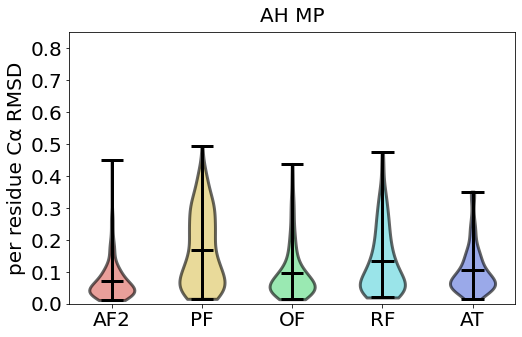

In [17]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_AH_MP, [1], showmeans=1)
vp_PF = plt.violinplot(x1_AH_MP, [2], showmeans=1)
vp_OF = plt.violinplot(x2_AH_MP, [3], showmeans=1)
vp_RF = plt.violinplot(x3_AH_MP, [4], showmeans=1)
vp_AT = plt.violinplot(x4_AH_MP, [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

'''plt.scatter([1,1,1], [min(x0_AH_MP), np.median(x0_AH_MP), max(x0_AH_MP)], color='k', s = 100)
plt.text(1, min(x0_AH_MP),
         min(AF_AH_MP_avg_rmsds, key=AF_AH_MP_avg_rmsds.get), 
        size=15)
plt.text(1, max(x0_AH_MP),
         max(AF_AH_MP_avg_rmsds, key=AF_AH_MP_avg_rmsds.get), 
        size=15)
plt.text(1, np.median(x0_AH_MP),
         ''.join([i for i,val in AF_AH_MP_avg_rmsds.items() if val == statistics.median_low(x0_AH_MP)]),        
        size=15)'''
plt.ylim(0,0.85)
plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)
plt.title('AH MP', size =20, pad=10)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
#plt.savefig('AH_MP_RMSD_violin.svg', format='svg')
plt.show()

In [18]:
print('PF: ' + str(stats.ttest_rel(x0_AH_MP, x1_AH_MP)[1]))
print('OF: ' + str(stats.ttest_rel(x0_AH_MP, x2_AH_MP)[1]))
print('RF: ' + str(stats.ttest_rel(x0_AH_MP, x3_AH_MP)[1]))
print('AT: ' + str(stats.ttest_rel(x0_AH_MP, x4_AH_MP)[1]))

PF: 2.712566554202266e-20
OF: 5.952139912354395e-07
RF: 6.270871807122647e-16
AT: 1.38512190304946e-13


In [19]:
AF_AH_MP_all_rmsds = []
for i, val in AF_AH_MP_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_AH_MP_all_rmsds.append(x)


In [20]:
for i,val in AT_AH_MP_avg_rmsds.items():
    AT_AH_MP_avg_rmsds[i] = val/peps.loc[i]['len']

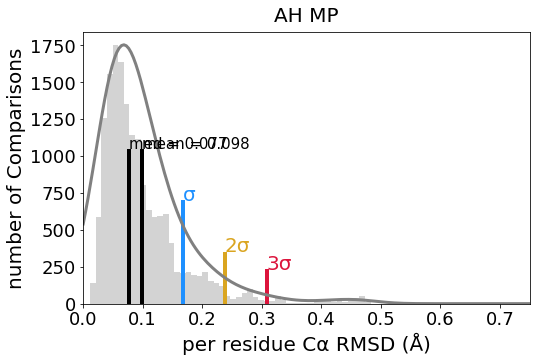

In [21]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_AH_MP_all_rmsds)
plt.hist(x, bins=50,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 700
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')


data1 = np.concatenate(AF_AH_MP_all_rmsds)
density = gaussian_kde(data1)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.plot(xrng, 250*density(xrng), color = 'grey', lw=3, ls='-')


plt.xlim(0,0.75)
plt.title('AH MP', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
#plt.savefig('AH_MP_RMSD_hist.svg', format='svg')
plt.show()



In [166]:
[i for i,val in AF_AH_MP_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['1FW5', '2B0Y', '2FXZ', '2K10', '2KI9', '2NCU', '2NCW', '2PV6']

In [93]:
print(AF_AH_MP_avg_rmsds['2FXZ'])

0.19392916666666668


In [95]:
find_models(15,AF_AH_MP_rmsds['2FXZ'])

AF model: 4
NMR model: [7]


In [86]:
print(AF_AH_MP_avg_rmsds['2FXZ'])

0.19392916666666668


In [167]:
[i for i,val in AF_AH_MP_avg_rmsds.items() if val > avg+2*std and  val < avg+3*std]

['1V4Z', '2M0H', '2MHW', '7B2F']

In [92]:
print(AF_AH_MP_avg_rmsds['7B2F'])

0.266610625


In [88]:
find_models(20,AF_AH_MP_rmsds['7B2F'])

AF model: 3
NMR model: [18]


In [168]:
[i for i,val in AF_AH_MP_avg_rmsds.items() if val > avg+3*std]

['2K98']

In [169]:
AF_AH_MP_avg_rmsds['2K98']

0.2802978260869565

### AH SL 

In [22]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/AH_SL_ss/'
PF_files = os.listdir(PF_path)
PF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    PF_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(PF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
PF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    PF_AH_SL_avg_rmsds[i] = []
for i,vals in PF_AH_SL_rmsds.items():
    PF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [23]:
for i,val in PF_AH_SL_avg_rmsds.items():
    PF_AH_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [24]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_SL_ss/'
AF_files = os.listdir(AF_path)
AF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_rmsds[i] = []
    
for j in AF_files:
    rmsds = []
    with open(AF_path+j, encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_avg_rmsds[i] = []
for i,vals in AF_AH_SL_rmsds.items():
    AF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [25]:
for i,val in AF_AH_SL_avg_rmsds.items():
    AF_AH_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [26]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/AH_SL_ss/'
OF_files = os.listdir(OF_path)

OF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    OF_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
OF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    OF_AH_SL_avg_rmsds[i] = []
for i,vals in OF_AH_SL_rmsds.items():
    OF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [27]:
for i,val in OF_AH_SL_avg_rmsds.items():
    OF_AH_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [28]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/AH_SL_ss/'
RF_files = os.listdir(RF_path)

RF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    RF_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(RF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
RF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    RF_AH_SL_avg_rmsds[i] = []
for i,vals in RF_AH_SL_rmsds.items():
    RF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [29]:
for i,val in RF_AH_SL_avg_rmsds.items():
    RF_AH_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [30]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/AH_SL_ss/'
AT_files = os.listdir(AT_path)

AT_AH_SL_rmsds = {}
for i in AH_SL_ids:
    AT_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
AT_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    AT_AH_SL_avg_rmsds[i] = []
for i,vals in AT_AH_SL_rmsds.items():
    AT_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [31]:
for i,val in AT_AH_SL_avg_rmsds.items():
    AT_AH_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [32]:
plot_df = pd.DataFrame()
x0_AH_SL = np.nan_to_num([val for i,val in AF_AH_SL_avg_rmsds.items()])
x1_AH_SL = np.nan_to_num([val for i,val in PF_AH_SL_avg_rmsds.items()])
x2_AH_SL = np.nan_to_num([val for i,val in OF_AH_SL_avg_rmsds.items()])
x3_AH_SL = np.nan_to_num([val for i,val in RF_AH_SL_avg_rmsds.items()])
x4_AH_SL = np.nan_to_num([val for i,val in AT_AH_SL_avg_rmsds.items()])

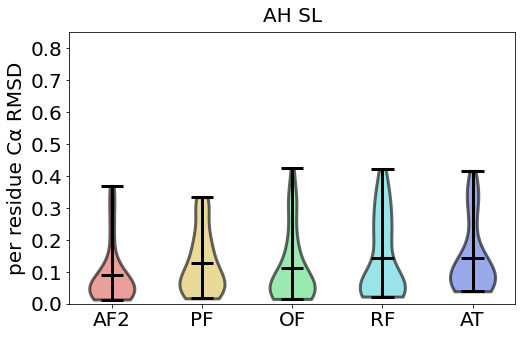

In [33]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_AH_SL, [1], showmeans=1)
vp_PF = plt.violinplot(x1_AH_SL, [2], showmeans=1)
vp_OF = plt.violinplot(x2_AH_SL, [3], showmeans=1)
vp_RF = plt.violinplot(x3_AH_SL, [4], showmeans=1)
vp_AT = plt.violinplot(x4_AH_SL, [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

'''plt.scatter([1,1,1], [min(x0_AH_SL), np.median(x0_AH_SL), max(x0_AH_SL)], color='k', s = 100)
plt.text(1, min(x0_AH_SL),
         min(AF_AH_SL_avg_rmsds, key=AF_AH_SL_avg_rmsds.get), 
        size=15)
plt.text(1, max(x0_AH_SL),
         max(AF_AH_SL_avg_rmsds, key=AF_AH_SL_avg_rmsds.get), 
        size=15)
plt.text(1, np.median(x0_AH_SL),
         ''.join([i for i,val in AF_AH_SL_avg_rmsds.items() if val == statistics.median_low(x0_AH_SL)]),        
        size=15)'''
plt.ylim(0,0.85)
plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)
plt.title('AH SL', size =20, pad=10)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
#plt.savefig('AH_SL_RMSD_violin.svg', format='svg')
plt.show()

In [34]:
print('PF: ' + str(stats.ttest_rel(x0_AH_SL, x1_AH_SL)[1]))
print('OF: ' + str(stats.ttest_rel(x0_AH_SL, x2_AH_SL)[1]))
print('RF: ' + str(stats.ttest_rel(x0_AH_SL, x3_AH_SL)[1]))
print('AT: ' + str(stats.ttest_rel(x0_AH_SL, x4_AH_SL)[1]))

PF: 0.0066720229294765804
OF: 0.0016892479133457437
RF: 0.0006447084496799577
AT: 0.00579186700239417


In [35]:
AF_AH_SL_all_rmsds = []
for i, val in AF_AH_SL_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_AH_SL_all_rmsds.append(x)
    

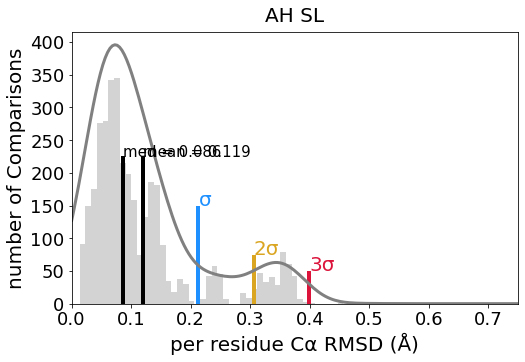

In [36]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_AH_SL_all_rmsds)
plt.hist(x, bins=50,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 150
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')


density = gaussian_kde(x)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : 0.4
density._compute_covariance()
plt.plot(xrng, 65*density(xrng), color = 'grey', lw=3, ls='-')


plt.xlim(0,0.75)
plt.title('AH SL', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
#plt.savefig('AH_SL_RMSD_hist.svg', format='svg')
plt.show()


In [39]:
'''plt.figure(figsize=(8,5))
x = np.concatenate(AF_MIX_SL_all_rmsds)
plt.hist(x, bins=30,color ='lightgrey', alpha=1)
#, edgecolor='k') avg = np.mean(x) std = np.std(x)
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)

y1 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.15 and i < 0.3]
plt.hist(y1, bins=5,color ='dodgerblue', alpha=1)#, edgecolor='k'
y2 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.3 and i < 0.5]
plt.hist(y2, bins=5,color ='goldenrod', alpha=1)#, edgecolor='k'
y3 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.5 ]
plt.hist(y3, bins=5,color ='crimson', alpha=1)#, edgecolor='k'

density = gaussian_kde(x) 
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : 0.2
density._compute_covariance()
plt.plot(xrng, 75*density(xrng), color = 'grey', lw=3, ls='-')

plt.xlim(0,0.75)
plt.title('AH SL', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18) 
#plt.savefig('FIG1_hist.svg', format='svg')
plt.show()'''

"plt.figure(figsize=(8,5))\nx = np.concatenate(AF_MIX_SL_all_rmsds)\nplt.hist(x, bins=30,color ='lightgrey', alpha=1)\n#, edgecolor='k') avg = np.mean(x) std = np.std(x)\nplt.vlines(avg, 0, hgt*1.5, lw=4, color='k')\nplt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)\n\ny1 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.15 and i < 0.3]\nplt.hist(y1, bins=5,color ='dodgerblue', alpha=1)#, edgecolor='k'\ny2 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.3 and i < 0.5]\nplt.hist(y2, bins=5,color ='goldenrod', alpha=1)#, edgecolor='k'\ny3 =[i for i in np.concatenate(AF_MIX_SL_all_rmsds) if i > 0.5 ]\nplt.hist(y3, bins=5,color ='crimson', alpha=1)#, edgecolor='k'\n\ndensity = gaussian_kde(x) \nxrng = np.linspace(0,0.8,200)\ndensity.covariance_factor = lambda : 0.2\ndensity._compute_covariance()\nplt.plot(xrng, 75*density(xrng), color = 'grey', lw=3, ls='-')\n\nplt.xlim(0,0.75)\nplt.title('AH SL', size =20, pad=10)\nplt.xlabel('per residue Cα RMSD (Å)', size=20)\n

In [98]:
[i for i,val in AF_AH_SL_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['1MF6', '2KPB', '2LQ1']

In [107]:

print(AF_AH_SL_avg_rmsds['2KPB'])


0.2236465217391304


In [106]:
find_models(20,AF_AH_SL_rmsds['2KPB'])

AF model: 4
NMR model: [8]


In [99]:
[i for i,val in AF_AH_SL_avg_rmsds.items() if val > avg+2*std and  val < avg+3*std]

['1AMB', '1FVY', '2IV6']

In [104]:
print(AF_AH_SL_avg_rmsds['1AMB'])

0.3687909523809524


In [102]:
find_models(20,AF_AH_SL_rmsds['1FVY'])

AF model: 3
NMR model: [5]


In [246]:
[i for i,val in AF_AH_SL_avg_rmsds.items() if val > avg+3*std]

[]

### BHPIN

In [40]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/BHPIN_ss/'
PF_files = os.listdir(PF_path)
PF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    PF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(PF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
PF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    PF_BHPIN_avg_rmsds[i] = []
for i,vals in PF_BHPIN_rmsds.items():
    PF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [41]:
for i,val in PF_BHPIN_avg_rmsds.items():
    PF_BHPIN_avg_rmsds[i] = val/peps.loc[i]['len']

In [42]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/BHPIN_ss/'
AF_files = os.listdir(AF_path)
AF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
AF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_avg_rmsds[i] = []
for i,vals in AF_BHPIN_rmsds.items():
    AF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [43]:
for i,val in AF_BHPIN_avg_rmsds.items():
    AF_BHPIN_avg_rmsds[i] = val/peps.loc[i]['len']

In [44]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/BHPIN_ss/'
OF_files = os.listdir(OF_path)
OF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    OF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
OF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    OF_BHPIN_avg_rmsds[i] = []
for i,vals in OF_BHPIN_rmsds.items():
    OF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [45]:
for i,val in OF_BHPIN_avg_rmsds.items():
    OF_BHPIN_avg_rmsds[i] = val/peps.loc[i]['len']

In [46]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/BHPIN_ss/'
RF_files = os.listdir(RF_path)
RF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    RF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(RF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
RF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    RF_BHPIN_avg_rmsds[i] = []
for i,vals in RF_BHPIN_rmsds.items():
    RF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [47]:
for i,val in RF_BHPIN_avg_rmsds.items():
    RF_BHPIN_avg_rmsds[i] = val/peps.loc[i]['len']

In [48]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/BHPIN_ss/'
AT_files = os.listdir(AT_path)
AT_BHPIN_rmsds = {}
for i in BHPIN_ids:
    AT_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
AT_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    AT_BHPIN_avg_rmsds[i] = []
for i,vals in AT_BHPIN_rmsds.items():
    AT_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [49]:
for i,val in AT_BHPIN_avg_rmsds.items():
    AT_BHPIN_avg_rmsds[i] = val/peps.loc[i]['len']

In [119]:
x0_BHPIN = np.nan_to_num([val for i,val in AF_BHPIN_avg_rmsds.items()])
x1_BHPIN = np.nan_to_num([val for i,val in PF_BHPIN_avg_rmsds.items()])
x2_BHPIN = np.nan_to_num([val for i,val in OF_BHPIN_avg_rmsds.items()])
x3_BHPIN = np.nan_to_num([val for i,val in RF_BHPIN_avg_rmsds.items()])
x4_BHPIN = np.nan_to_num([val for i,val in AT_BHPIN_avg_rmsds.items()])

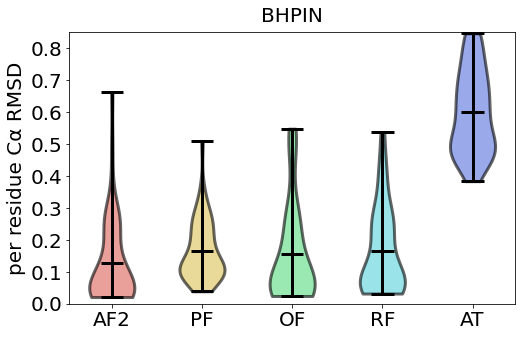

In [121]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_BHPIN , [1], showmeans=1)
vp_PF = plt.violinplot(x1_BHPIN , [2], showmeans=1)
vp_OF = plt.violinplot(x2_BHPIN , [3], showmeans=1)
vp_RF = plt.violinplot(x3_BHPIN , [4], showmeans=1)
vp_AT = plt.violinplot(x4_BHPIN , [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

'''plt.scatter([1,1,1], [min(x0_BHPIN), np.median(x0_BHPIN), max(x0_BHPIN)], color='k', s = 100)
plt.text(1, min(x0_BHPIN),
         min(AF_BHPIN_avg_rmsds, key=AF_BHPIN_avg_rmsds.get), 
        size=15)
plt.text(1, max(x0_BHPIN),
         max(AF_BHPIN_avg_rmsds, key=AF_BHPIN_avg_rmsds.get), 
        size=15)
plt.text(1, np.median(x0_BHPIN),
         ''.join([i for i,val in AF_BHPIN_avg_rmsds.items() if val == statistics.median_low(x0_BHPIN)]),        
        size=15)'''

plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)

plt.ylim(0,0.85)
plt.title('BHPIN', size=20, pad=10)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
plt.savefig('BHPIN_RMSD_violin.svg', format='svg')
plt.show()

In [122]:
print('PF: ' + str(stats.ttest_rel(x0_BHPIN, x1_BHPIN)[1]))
print('OF: ' + str(stats.ttest_rel(x0_BHPIN, x2_BHPIN)[1]))
print('RF: ' + str(stats.ttest_rel(x0_BHPIN, x3_BHPIN)[1]))
print('AT: ' + str(stats.ttest_rel(x0_BHPIN, x4_BHPIN)[1]))

PF: 0.0006728867215676203
OF: 0.0016835478726514959
RF: 0.0008486021117649852
AT: 2.9555884571515647e-30


In [134]:
find_models(20,AF_BHPIN_rmsds['2N68'])

AF model: 3
NMR model: [18]


In [189]:
AF_BHPIN_all_rmsds = []
for i, val in AF_BHPIN_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_BHPIN_all_rmsds.append(x)
    

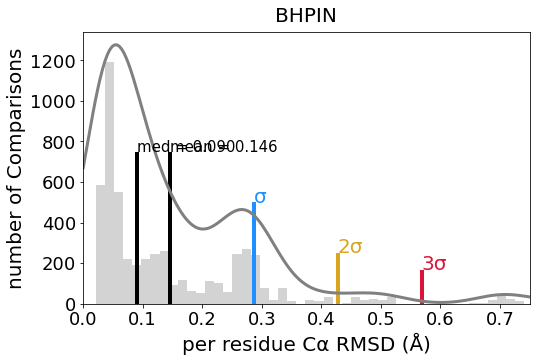

In [197]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_BHPIN_all_rmsds)
plt.hist(x, bins=50,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 500
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')

density = gaussian_kde(x)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : .3
density._compute_covariance()
plt.plot(xrng, 260*density(xrng), color = 'grey', lw=3, ls='-')


plt.xlim(0,0.75)
plt.title('BHPIN', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
plt.savefig('BHPIN_RMSD_hist.svg', format='svg')
plt.show()

In [191]:
[i for i,val in AF_BHPIN_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['2MMT', '2MMW', '2MW3']

In [192]:
[i for i,val in AF_BHPIN_avg_rmsds.items() if val > avg+2*std and  val < avg+3*std]

['2JN5']

In [195]:
AF_BHPIN_avg_rmsds['2N68']

0.6611875

In [146]:
find_models(15,AF_BHPIN_rmsds['2MMT'] )

AF model: 3
NMR model: [8]


In [193]:
[i for i,val in AF_BHPIN_avg_rmsds.items() if val >= avg+3*std]

['2N68']

### MIX MP

In [199]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/MIX_MP_ss/'
PF_files = os.listdir(PF_path)
PF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    PF_MIX_MP_rmsds[i] = []
    
for j in MIX_MP_ids:
    rmsds = []
    with open(PF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
PF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    PF_MIX_MP_avg_rmsds[i] = []
for i,vals in PF_MIX_MP_rmsds.items():
    PF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [200]:
for i,val in PF_MIX_MP_avg_rmsds.items():
    PF_MIX_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [201]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_MP_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_rmsds[i] = []
    
for j in AF_files:
    rmsds = []
    with open(AF_path+j, encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_avg_rmsds[i] = []
for i,vals in AF_MIX_MP_rmsds.items():
    AF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [202]:
for i,val in AF_MIX_MP_avg_rmsds.items():
    AF_MIX_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [203]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/MIX_MP_ss/'
OF_files = os.listdir(OF_path)
OF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    OF_MIX_MP_rmsds[i] = []
    
for j in MIX_MP_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
OF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    OF_MIX_MP_avg_rmsds[i] = []
for i,vals in OF_MIX_MP_rmsds.items():
    OF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [204]:
for i,val in OF_MIX_MP_avg_rmsds.items():
    OF_MIX_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [205]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/MIX_MP_ss/'
RF_files = os.listdir(RF_path)
RF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    RF_MIX_MP_rmsds[i] = []
    
for j in MIX_MP_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
RF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    RF_MIX_MP_avg_rmsds[i] = []
for i,vals in RF_MIX_MP_rmsds.items():
    RF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [206]:
for i,val in RF_MIX_MP_avg_rmsds.items():
    RF_MIX_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [207]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/MIX_MP_ss/'
AT_files = os.listdir(AT_path)
AT_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    AT_MIX_MP_rmsds[i] = []
    
for j in MIX_MP_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
AT_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    AT_MIX_MP_avg_rmsds[i] = []
for i,vals in AT_MIX_MP_rmsds.items():
    AT_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [208]:
for i,val in AT_MIX_MP_avg_rmsds.items():
    AT_MIX_MP_avg_rmsds[i] = val/peps.loc[i]['len']

In [209]:
## get missing models
#MIX_MP_missing = []
#for i,val in AF_MIX_MP_avg_rmsds.items():
 #   if np.isnan(val):
  #      MIX_MP_missing.append(i)

In [210]:
x0_MIX_MP = np.nan_to_num([val for i,val in AF_MIX_MP_avg_rmsds.items()])
x1_MIX_MP = np.nan_to_num([val for i,val in PF_MIX_MP_avg_rmsds.items()])
x2_MIX_MP = np.nan_to_num([val for i,val in OF_MIX_MP_avg_rmsds.items()])
x3_MIX_MP = np.nan_to_num([val for i,val in RF_MIX_MP_avg_rmsds.items()])
x4_MIX_MP = np.nan_to_num([val for i,val in AT_MIX_MP_avg_rmsds.items()])

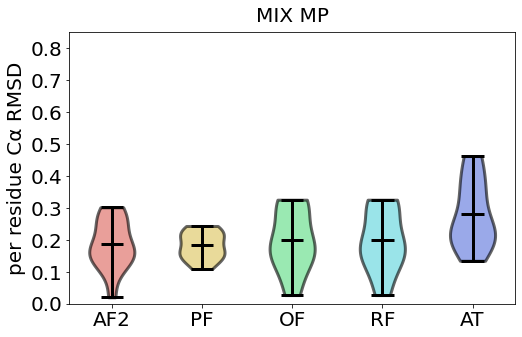

In [211]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_MIX_MP , [1], showmeans=1)
vp_PF = plt.violinplot(x1_MIX_MP , [2], showmeans=1)
vp_OF = plt.violinplot(x2_MIX_MP , [3], showmeans=1)
vp_RF = plt.violinplot(x3_MIX_MP , [4], showmeans=1)
vp_AT = plt.violinplot(x4_MIX_MP , [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)

plt.ylim(0,.85)
plt.title('MIX MP', size = 20, pad =10)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
#plt.savefig('MIX_MP_RMSD_violin.svg', format='svg')
plt.show()

In [212]:
print('PF: ' + str(stats.ttest_rel(x0_MIX_MP, x1_MIX_MP)[1]))
print('OF: ' + str(stats.ttest_rel(x0_MIX_MP, x2_MIX_MP)[1]))
print('RF: ' + str(stats.ttest_rel(x0_MIX_MP, x3_MIX_MP)[1]))
print('AT: ' + str(stats.ttest_rel(x0_MIX_MP, x4_MIX_MP)[1]))

PF: 0.776134348889971
OF: 0.4987340210386907
RF: 0.4987340210386907
AT: 0.009233595853702703


In [213]:
find_models(1,AF_MIX_MP_rmsds['1SOL'])

AF model: 3
NMR model: [0]


In [214]:
AF_MIX_MP_all_rmsds = []
for i, val in AF_MIX_MP_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_MIX_MP_all_rmsds.append(x)

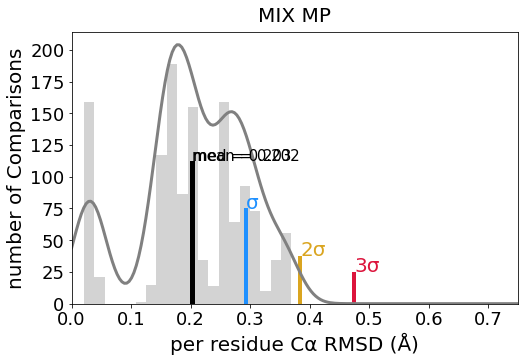

In [215]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_MIX_MP_all_rmsds)
plt.hist(x, bins=20,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 75
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')



density = gaussian_kde(x)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : .3
density._compute_covariance()
plt.plot(xrng, 40*density(xrng), color = 'grey', lw=3, ls='-')


plt.xlim(0,0.75)
plt.title('MIX MP', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
#plt.savefig('MIX_MP_RMSD_hist.svg', format='svg')
plt.show()


In [35]:
[i for i,val in AF_MIX_MP_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['5T7Q']

In [38]:
AF_MIX_MP_avg_rmsds['5T7Q']

{'1CW6': 0.12161137931034484,
 '1JRJ': 0.020352679999999998,
 '1MEQ': 0.13144954545454546,
 '1SOL': 0.27215,
 '2L3I': 0.1718559090909091,
 '2LE7': 0.25169,
 '2LKE': 0.14979391304347828,
 '2M1J': 0.19052423076923078,
 '2NAT': 0.17291370370370368,
 '2NB8': 0.24545615384615382,
 '2NCV': 0.283554,
 '5L82': 0.15654333333333334,
 '5T7Q': 0.3018325,
 '6FS4': 0.14572538461538462}

In [41]:
find_models(20, AF_MIX_MP_rmsds['2NCV'])

AF model: 4
NMR model: [19]


In [36]:
[i for i,val in AF_MIX_MP_avg_rmsds.items() if val > avg]

['1SOL', '2LE7', '2NB8', '2NCV', '5T7Q']

In [33]:
[i for i,val in AF_MIX_MP_avg_rmsds.items() if val > avg+3*std]

[]

In [37]:
max(AF_MIX_MP_avg_rmsds, key=AF_MIX_MP_avg_rmsds.get)

'5T7Q'

### MIX SL

In [216]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/MIX_SL_ss/'
PF_files = os.listdir(PF_path)
PF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    PF_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(PF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
PF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    PF_MIX_SL_avg_rmsds[i] = []
for i,vals in PF_MIX_SL_rmsds.items():
    PF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [217]:
for i,val in PF_MIX_SL_avg_rmsds.items():
    PF_MIX_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [218]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_SL_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_rmsds[i] = []
    
for j in AF_files:
    rmsds = []
    with open(AF_path+j, encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_avg_rmsds[i] = []
for i,vals in AF_MIX_SL_rmsds.items():
    AF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [219]:
for i,val in AF_MIX_SL_avg_rmsds.items():
    AF_MIX_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [220]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/MIX_SL_ss/'
OF_files = os.listdir(OF_path)
OF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    OF_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
OF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    OF_MIX_SL_avg_rmsds[i] = []
for i,vals in OF_MIX_SL_rmsds.items():
    OF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [221]:
for i,val in OF_MIX_SL_avg_rmsds.items():
    OF_MIX_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [222]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/MIX_SL_ss/'
RF_files = os.listdir(RF_path)
RF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    RF_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(RF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
RF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    RF_MIX_SL_avg_rmsds[i] = []
for i,vals in RF_MIX_SL_rmsds.items():
    RF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [223]:
for i,val in RF_MIX_SL_avg_rmsds.items():
    RF_MIX_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [224]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/MIX_SL_ss/'
AT_files = os.listdir(AT_path)
AT_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    AT_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
AT_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    AT_MIX_SL_avg_rmsds[i] = []
for i,vals in AT_MIX_SL_rmsds.items():
    AT_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [225]:
for i,val in AT_MIX_SL_avg_rmsds.items():
    AT_MIX_SL_avg_rmsds[i] = val/peps.loc[i]['len']

In [226]:
## get missing models
#MIX_SL_missing = []
#for i,val in AF_MIX_SL_avg_rmsds.items():
 #   if np.isnan(val):
  #      MIX_SL_missing.append(i)

In [227]:
x0_MIX_SL = np.nan_to_num([val for i,val in AF_MIX_SL_avg_rmsds.items()])
x1_MIX_SL = np.nan_to_num([val for i,val in PF_MIX_SL_avg_rmsds.items()])
x2_MIX_SL = np.nan_to_num([val for i,val in OF_MIX_SL_avg_rmsds.items()])
x3_MIX_SL = np.nan_to_num([val for i,val in RF_MIX_SL_avg_rmsds.items()])
x4_MIX_SL = np.nan_to_num([val for i,val in AT_MIX_SL_avg_rmsds.items()])

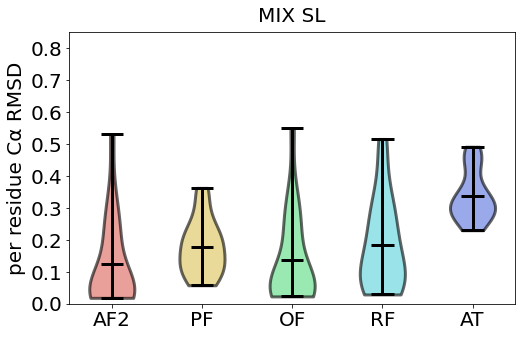

In [228]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_MIX_SL , [1], showmeans=1)
vp_PF = plt.violinplot(x1_MIX_SL , [2], showmeans=1)
vp_OF = plt.violinplot(x2_MIX_SL , [3], showmeans=1)
vp_RF = plt.violinplot(x3_MIX_SL , [4], showmeans=1)
vp_AT = plt.violinplot(x4_MIX_SL , [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)
plt.ylim(0,.85)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
plt.title('MIX SL', size =20, pad=10)
plt.savefig('MIX_SL_RMSD_violin.svg', format='svg')
plt.show()

In [229]:
print('PF: ' + str(stats.ttest_rel(x0_MIX_SL, x1_MIX_SL)[1]))
print('OF: ' + str(stats.ttest_rel(x0_MIX_SL, x2_MIX_SL)[1]))
print('RF: ' + str(stats.ttest_rel(x0_MIX_SL, x3_MIX_SL)[1]))
print('AT: ' + str(stats.ttest_rel(x0_MIX_SL, x4_MIX_SL)[1]))

PF: 0.03790986820047
OF: 0.11550936601504055
RF: 0.003042358893376465
AT: 1.1904700470064008e-07


In [230]:
len(MIX_SL_ids)

21

In [231]:
find_models(10, AF_MIX_SL_rmsds['2BBL'])

AF model: 2
NMR model: [8]


In [232]:
AF_MIX_SL_all_rmsds = []
for i, val in AF_MIX_SL_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_MIX_SL_all_rmsds.append(x)

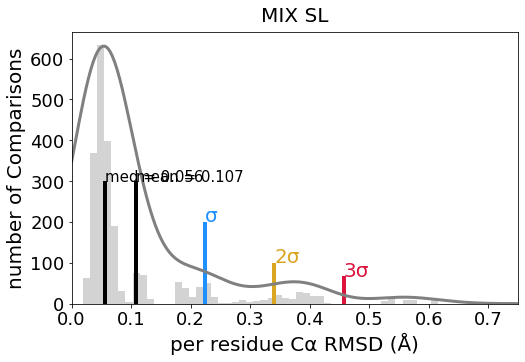

In [233]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_MIX_SL_all_rmsds)
plt.hist(x, bins=50,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 200
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')



density = gaussian_kde(x)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : .4
density._compute_covariance()
plt.plot(xrng, 100*density(xrng), color = 'grey', lw=3, ls='-')


plt.xlim(0,0.75)
plt.title('MIX SL', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
plt.savefig('MIX_SL_RMSD_hist.svg', format='svg')
plt.show()


In [112]:
[i for i,val in AF_MIX_SL_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['2L5I', '2LL2']

In [114]:
AF_MIX_SL_avg_rmsds['2LL2']

0.2641822222222222

In [115]:
AF_MIX_SL_avg_rmsds['2L5I']

0.2797485

In [67]:
[i for i,val in AF_MIX_SL_avg_rmsds.items() if val >= avg+2*std and  val <= avg+3*std]

['1S4T']

In [113]:
AF_MIX_SL_avg_rmsds['2LL2']

0.2641822222222222

In [68]:
[i for i,val in AF_MIX_SL_avg_rmsds.items() if val > avg+3*std]

['2BBL']

In [116]:
find_models(8, AF_MIX_SL_rmsds['2L5I'])

AF model: 4
NMR model: [1]


## DSRP

In [158]:
PF_path = '../PEPFOLD3_Predictions/RMSD_calculations/DSRP_ss/'
PF_files = os.listdir(PF_path)
PF_DSRP_rmsds = {}
for i in DSRP_ids:
    PF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(PF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    PF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
PF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    PF_DSRP_avg_rmsds[i] = []
for i,vals in PF_DSRP_rmsds.items():
    PF_DSRP_avg_rmsds[i] = (np.amin(vals))

In [159]:
for i,val in PF_DSRP_avg_rmsds.items():
    PF_DSRP_avg_rmsds[i] = val/peps.loc[i]['len']

In [176]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/DSRP_ss/'
AF_files = os.listdir(AF_path)
AF_DSRP_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
AF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_avg_rmsds[i] = []
for i,vals in AF_DSRP_rmsds.items():
    AF_DSRP_avg_rmsds[i] = (np.amin(vals))

In [178]:
for i,val in AF_DSRP_avg_rmsds.items():
    AF_DSRP_avg_rmsds[i] = val/peps.loc[i]['len']

In [162]:
OF_path = '../OmegaFold_Predictions/RMSD_Calculations/DSRP_ss/'
OF_files = os.listdir(OF_path)
OF_DSRP_rmsds = {}
for i in DSRP_ids:
    OF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(OF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    OF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
OF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    OF_DSRP_avg_rmsds[i] = []
for i,vals in OF_DSRP_rmsds.items():
    OF_DSRP_avg_rmsds[i] = (np.amin(vals))

In [163]:
for i,val in OF_DSRP_avg_rmsds.items():
    OF_DSRP_avg_rmsds[i] = val/peps.loc[i]['len']

In [164]:
RF_path = '../RoseTTAFold_Predictions/RMSD_Calculations/DSRP_ss/'
RF_files = os.listdir(RF_path)
RF_DSRP_rmsds = {}
for i in DSRP_ids:
    RF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(RF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    RF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
RF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    RF_DSRP_avg_rmsds[i] = []
for i,vals in RF_DSRP_rmsds.items():
    RF_DSRP_avg_rmsds[i] = (np.amin(vals))

In [165]:
for i,val in RF_DSRP_avg_rmsds.items():
    RF_DSRP_avg_rmsds[i] = val/peps.loc[i]['len']

In [166]:
AT_path = '../APPTest_Predictions/RMSD_Calculations/DSRP_ss/'
AT_files = os.listdir(AT_path)
AT_DSRP_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(AT_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AT_DSRP_rmsds[j.split('_')[0]] = rmsds
    
AT_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    AT_DSRP_avg_rmsds[i] = []
for i,vals in AT_DSRP_rmsds.items():
    AT_DSRP_avg_rmsds[i] = (np.amin(vals))

In [167]:
for i,val in AT_DSRP_avg_rmsds.items():
    AT_DSRP_avg_rmsds[i] = val/peps.loc[i]['len']

In [168]:
## get missing models
#DSRP_missing = []
#for i,val in AF_DSRP_avg_rmsds.items():
 #   if np.isnan(val):
  #      DSRP_missing.append(i)

In [169]:
x0_DSRP = np.nan_to_num([val for i,val in AF_DSRP_avg_rmsds.items()])
x1_DSRP = np.nan_to_num([val for i,val in PF_DSRP_avg_rmsds.items()])
x2_DSRP = np.nan_to_num([val for i,val in OF_DSRP_avg_rmsds.items()])
x3_DSRP = np.nan_to_num([val for i,val in RF_DSRP_avg_rmsds.items()])
x4_DSRP = np.nan_to_num([val for i,val in AT_DSRP_avg_rmsds.items()])

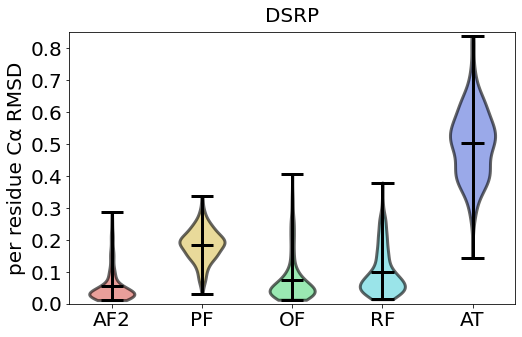

In [170]:
plt.figure(figsize=(8,5))

vp_AF = plt.violinplot(x0_DSRP , [1], showmeans=1)
vp_PF = plt.violinplot(x1_DSRP , [2], showmeans=1)
vp_OF = plt.violinplot(x2_DSRP , [3], showmeans=1)
vp_RF = plt.violinplot(x3_DSRP , [4], showmeans=1)
vp_AT = plt.violinplot(x4_DSRP , [5], showmeans=1)

plt.setp(vp_AF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AF['cmeans'], color='k', linewidth =3)
plt.setp(vp_AF['cmins'], color='k', linewidth =3)
plt.setp(vp_AF['cbars'], color='k', linewidth =3)
plt.setp(vp_AF['bodies'], facecolor ='#db5f57', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_PF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_PF['cmeans'], color='k', linewidth =3)
plt.setp(vp_PF['cmins'], color='k', linewidth =3)
plt.setp(vp_PF['cbars'], color='k', linewidth =3)
plt.setp(vp_PF['bodies'], facecolor ='#dbc257', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_OF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_OF['cmeans'], color='k', linewidth =3)
plt.setp(vp_OF['cmins'], color='k', linewidth =3)
plt.setp(vp_OF['cbars'], color='k', linewidth =3)
plt.setp(vp_OF['bodies'], facecolor ='#57db80', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_RF['cmaxes'], color='k', linewidth =3)
plt.setp(vp_RF['cmeans'], color='k', linewidth =3)
plt.setp(vp_RF['cmins'], color='k', linewidth =3)
plt.setp(vp_RF['cbars'], color='k', linewidth =3)
plt.setp(vp_RF['bodies'], facecolor ='#57d3db', edgecolor='k', alpha=0.6, linewidth =3)

plt.setp(vp_AT['cmaxes'], color='k', linewidth =3)
plt.setp(vp_AT['cmeans'], color='k', linewidth =3)
plt.setp(vp_AT['cmins'], color='k', linewidth =3)
plt.setp(vp_AT['cbars'], color='k', linewidth =3)
plt.setp(vp_AT['bodies'], facecolor ='#5770db', edgecolor='k', alpha=0.6, linewidth =3)

'''plt.scatter([1,1,1], [min(x0_DSRP), np.median(x0_DSRP), max(x0_DSRP)], color='k', s = 100)
plt.text(1, min(x0_DSRP),
         min(AF_DSRP_avg_rmsds, key=AF_DSRP_avg_rmsds.get), 
        size=15)
plt.text(1, max(x0_DSRP),
         max(AF_DSRP_avg_rmsds, key=AF_DSRP_avg_rmsds.get), 
        size=15)
plt.text(1, np.median(x0_DSRP),
         ''.join([i for i,val in AF_DSRP_avg_rmsds.items() if val == statistics.median_low(x0_DSRP)]),        
        size=15)'''
plt.ylim(0,.85)
plt.xticks(ticks = [1,2,3,4,5],labels=['AF2', 'PF', 'OF', 'RF', 'AT'], size=20)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=20)
plt.title('DSRP', size =20, pad=10)
plt.savefig('DSRP_RMSD_violin.svg', format='svg')
plt.show()

In [171]:
print('PF: ' + str(stats.ttest_rel(x0_DSRP, x1_DSRP)[1]))
print('OF: ' + str(stats.ttest_rel(x0_DSRP, x2_DSRP)[1]))
print('RF: ' + str(stats.ttest_rel(x0_DSRP, x3_DSRP)[1]))
print('AT: ' + str(stats.ttest_rel(x0_DSRP, x4_DSRP)[1]))

PF: 3.880174250483887e-96
OF: 1.3448472605544866e-09
RF: 1.595175890009093e-30
AT: 5.080153454052096e-154


In [179]:
AF_DSRP_all_rmsds = []
for i, val in AF_DSRP_rmsds.items():
    x = val/peps.loc[i]['len']
    AF_DSRP_all_rmsds.append(x)

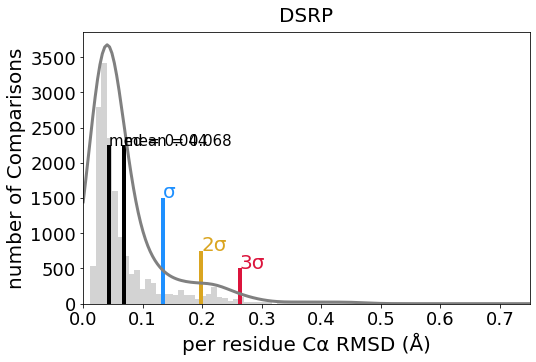

In [238]:
plt.figure(figsize=(8,5))
x = np.concatenate(AF_DSRP_all_rmsds)
plt.hist(x, bins=50,color ='lightgrey', alpha=1)#, edgecolor='k')
avg = np.mean(x)
std = np.std(x)
hgt = 1500
plt.vlines(avg, 0, hgt*1.5, lw=4, color='k')
plt.text(avg, hgt*1.5, 'mean = ' + str(avg)[:5], size=15)
med = np.median(x)
plt.vlines(med, 0, hgt*1.5, lw=4, color='k')
plt.text(med, hgt*1.5, 'med = ' + str(med)[:5], size=15)

plt.vlines(avg+ std, 0, hgt, lw=4, color='dodgerblue')
plt.text(avg+std, hgt, '\u03C3', size=20, color='dodgerblue')
plt.vlines(avg+ 2*std, 0, hgt/2, lw=4, color='goldenrod')
plt.text(avg+2*std, hgt/2, '2\u03C3', size=20, color='goldenrod')
plt.vlines(avg+ 3*std, 0, hgt/3, lw=4, color='crimson')
plt.text(avg+3*std, hgt/3, '3\u03C3', size=20, color='crimson')

density = gaussian_kde(x)
xrng = np.linspace(0,0.8,200)
density.covariance_factor = lambda : .4
density._compute_covariance()
plt.plot(xrng, 350*density(xrng), color = 'grey', lw=3, ls='-')

plt.xlim(0,0.75)
plt.title('DSRP', size =20, pad=10)
plt.xlabel('per residue C\u03B1 RMSD (\u212B)', size=20)
plt.xticks(size=18)
plt.ylabel('number of Comparisons', size = 20)
plt.yticks(size=18)
plt.savefig('DSRP_RMSD_hist.svg', format='svg')
plt.show()


In [251]:
[i for i,val in AF_DSRP_avg_rmsds.items() if val > avg+std and  val < avg+2*std]

['1DEC',
 '1M4F',
 '1SRB',
 '1V6R',
 '1WQD',
 '2BBG',
 '2G6U',
 '2KYJ',
 '2LDE',
 '2LDF',
 '2LSQ',
 '2MIX',
 '3BBG',
 '5UJH',
 '7LQR']

In [252]:
AF_DSRP_avg_rmsds['3BBG']

0.1781671794871795

In [253]:
find_models(2,AF_DSRP_rmsds['3BBG'])

AF model: 1
NMR model: [0]


In [241]:
[i for i,val in AF_DSRP_avg_rmsds.items() if val > avg+2*std and  val < avg+3*std]

['1K0P',
 '1N5G',
 '1RPC',
 '2B5B',
 '2EFZ',
 '2LS1',
 '2MSF',
 '6NW8',
 '7EDK',
 '7ELY']

In [242]:
[i for i,val in AF_DSRP_avg_rmsds.items() if val > avg+3*std]

['7L7A']

In [247]:
AF_DSRP_avg_rmsds['2MSF']

0.25679178571428574

## Correlation Plots

In [50]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_MP_ss/'
AF_files = os.listdir(AF_path)
AF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_MP_avg_rmsds = {}
AF_AH_MP_min_rmsds = {}
AF_AH_MP_max_rmsds = {}
AF_AH_MP_std_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_avg_rmsds[i] = []
    AF_AH_MP_min_rmsds[i] = []
    AF_AH_MP_max_rmsds[i] = []
    AF_AH_MP_std_rmsds[i] = []

for i,vals in AF_AH_MP_rmsds.items():
    AF_AH_MP_avg_rmsds[i] = (np.mean(vals))
    AF_AH_MP_min_rmsds[i] = (np.amin(vals))
    AF_AH_MP_max_rmsds[i] = (np.amax(vals))
    AF_AH_MP_std_rmsds[i] = (np.std(vals))

In [7]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_SL_ss/'
AF_files = os.listdir(AF_path)
AF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_avg_rmsds[i] = []
for i,vals in AF_AH_SL_rmsds.items():
    AF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [8]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/BHPIN_ss/'
AF_files = os.listdir(AF_path)
AF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
AF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_avg_rmsds[i] = []
for i,vals in AF_BHPIN_rmsds.items():
    AF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [9]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_SL_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_avg_rmsds[i] = []
for i,vals in AF_MIX_SL_rmsds.items():
    AF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [10]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_MP_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_rmsds[i] = []
    
for j in MIX_MP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_avg_rmsds[i] = []
for i,vals in AF_MIX_MP_rmsds.items():
    AF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [11]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/DSRP_ss/'
AF_files = os.listdir(AF_path)
AF_DSRP_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
AF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_avg_rmsds[i] = []
for i,vals in AF_DSRP_rmsds.items():
    AF_DSRP_avg_rmsds[i] = (np.amin(vals))

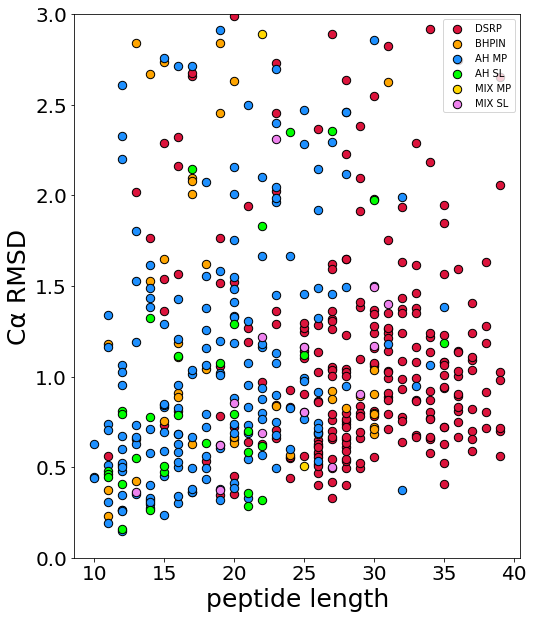

In [18]:
plt.figure(figsize=(8,10))
x_AH_MP = [peps.loc[i]['len'] for i,val in AF_AH_MP_avg_rmsds.items()]
y_AH_MP = [val for i,val in AF_AH_MP_avg_rmsds.items()]

x_AH_SL = [peps.loc[i]['len'] for i,val in AF_AH_SL_avg_rmsds.items()]
y_AH_SL = [val for i,val in AF_AH_SL_avg_rmsds.items()]

x_MIX_MP = [peps.loc[i]['len'] for i,val in AF_MIX_MP_avg_rmsds.items()]
y_MIX_MP = [val for i,val in AF_MIX_MP_avg_rmsds.items()]

x_MIX_SL = [peps.loc[i]['len'] for i,val in AF_MIX_SL_avg_rmsds.items()]
y_MIX_SL = [val for i,val in AF_MIX_SL_avg_rmsds.items()]

x_BHPIN = [peps.loc[i]['len'] for i,val in AF_BHPIN_avg_rmsds.items()]
y_BHPIN = [val for i,val in AF_BHPIN_avg_rmsds.items()]

x_DSRP = [peps.loc[i]['len'] for i,val in AF_DSRP_avg_rmsds.items()]
y_DSRP = [val for i,val in AF_DSRP_avg_rmsds.items()]


plt.scatter(x_DSRP,   y_DSRP, color='crimson', s=70, edgecolor='k')
plt.scatter(x_BHPIN,  y_BHPIN, color='orange', s=70, edgecolor='k')
plt.scatter(x_AH_MP,  y_AH_MP, color='dodgerblue', s=70, edgecolor='k')
plt.scatter(x_AH_SL,  y_AH_SL, color='lime', s=70, edgecolor='k')
plt.scatter(x_MIX_MP, y_MIX_MP, color='gold', s=70, edgecolor='k')
plt.scatter(x_MIX_SL, y_MIX_SL, color='violet', s=70, edgecolor='k')


plt.ylim(0,3)

labs = ['DSRP', 'BHPIN',  'AH MP', 'AH SL','MIX MP', 'MIX SL']
plt.legend(labs)
plt.xlabel('peptide length', size=25)
plt.xticks(size=20)
plt.ylabel('C\u03B1 RMSD', size = 25)
plt.yticks(size=20)
plt.savefig('length_vs_RMSD_zoomed.svg', format='svg')
plt.show()

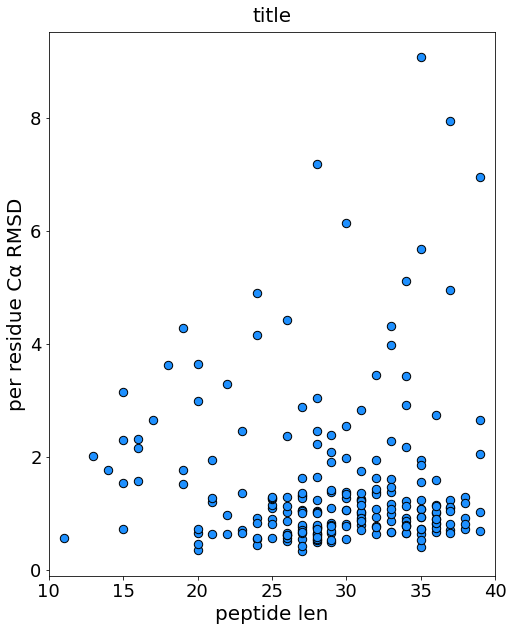

In [361]:
plt.figure(figsize=(8,10))

x = [peps.loc[i]['len'] for i,val in AF_DSRP_avg_rmsds.items()]
y = [val for i,val in AF_DSRP_avg_rmsds.items()]



plt.scatter(x, y, color='dodgerblue', s=70, edgecolor='k')

plt.xlim(10,40)
#plt.ylim(0,0.1)

#labs = ['BHPIN']
#plt.legend(labs)
plt.title('title', size =20, pad=10)
plt.xlabel('peptide len', size=20)
plt.xticks(size=18)
plt.ylabel('per residue C\u03B1 RMSD', size = 20)
plt.yticks(size=18)
plt.show()

## Export all the data

In [196]:
peptides.head(10)

,APPTEST,PEPFold3,Name,Type,Structured Region for RMSD calculation,FASTA Sequence,Length,Description,Unnamed: 8
0,✓,✓,6X7I,AH_MP,213-233,GQERFNRWFLTGMTVAGVVLLGSLFSRK,28.0,Structure of the C-terminal domain of BCL-XL i...,NaN
1,✓,✓,1MP6,AH_MP,22-46,SSDPLVVAASIIGILHLILWILDRL,25.0,Structure of the transmembrane region of the M...,NaN
2,✓,✓,2MC7,AH_MP,6-27,MNRSPDKIIALIFLLISLLVLCLALWQIVF,30.0,Structure of Salmonella MgtR,NaN
3,✓,NaN,1A11,AH_MP,1-25,GSEKMSTAISVLLAQAVFLLLTSQR,25.0,NMR STRUCTURE OF MEMBRANE SPANNING SEGMENT 2 O...,NaN
4,✓,✓,1ALE,AH_MP,3-16,ALDKLKEFGNTLEDKARE,18.0,CONFORMATION OF TWO PEPTIDES CORRESPONDING TO ...,NaN
5,✓,✓,1ALF,AH_MP,4-19,SAKMREWFSETFQKVKEKL,19.0,CONFORMATION OF TWO PEPTIDES CORRESPONDING TO ...,NaN
6,✓,✓,1B9Q,AH_MP,11-27,CAVELRSPGISRFRRKIAKRSIKTLEHKRENAKE,34.0,NMR STRUCTURE OF HEPARIN BINDING SITE OF NON C...,NaN
7,✓,✓,1BM4,AH_MP,16-29,CAKVKGITQGPNESPSAFLERLKEAYRRYTPY,32.0,MOMLV CAPSID PROTEIN MAJOR HOMOLOGY REGION PEP...,NaN
8,✓,✓,1BMX,AH_MP,14-26,CSILDIRQGPKEPFRDYVDRFYKTLRAEQAS,31.0,HIV-1 CAPSID PROTEIN MAJOR HOMOLOGY REGION PEP...,NaN
9,✓,✓,1CFG,AH_MP,8-18,TRYLRIHPQSWVHQIALRMEVL,22.0,MEMBRANE-BINDING PEPTIDE FROM THE C2 DOMAIN OF...,NaN


In [198]:
peptides.set_index('Name ', inplace=True)

In [201]:
peptides['AF2 min RMSD'] = np.zeros(len(peptides))

In [193]:
AF_mins =  AF_AH_MP_avg_rmsds#.update(AF_AH_SL_avg_rmsds)
AF_mins.update(AF_MIX_MP_avg_rmsds)
AF_mins.update(AF_MIX_SL_avg_rmsds)
AF_mins.update(AF_BHPIN_avg_rmsds)
AF_mins.update(AF_DSRP_avg_rmsds)

In [204]:
for i, val in AF_mins.items():
    peptides.loc[i] = val

In [205]:
peptides.head(40)

,APPTEST,PEPFold3,Type,Structured Region for RMSD calculation,FASTA Sequence,Length,Description,Unnamed: 8,AF2 min RMSD
Name,,,,,,,,,
6X7I,0.410386,0.410386,0.410386,0.410386,0.410386,0.410386,0.410386,0.410386,0.410386
1MP6,1.66455,1.66455,1.66455,1.66455,1.66455,1.664550,1.66455,1.66455,1.664550
2MC7,0.332325,0.332325,0.332325,0.332325,0.332325,0.332325,0.332325,0.332325,0.332325
1A11,0.828944,0.828944,0.828944,0.828944,0.828944,0.828944,0.828944,0.828944,0.828944
1ALE,0.628961,0.628961,0.628961,0.628961,0.628961,0.628961,0.628961,0.628961,0.628961
1ALF,0.82962,0.82962,0.82962,0.82962,0.82962,0.829620,0.82962,0.82962,0.829620
1B9Q,0.501387,0.501387,0.501387,0.501387,0.501387,0.501387,0.501387,0.501387,0.501387
1BM4,0.350087,0.350087,0.350087,0.350087,0.350087,0.350087,0.350087,0.350087,0.350087
1BMX,0.343908,0.343908,0.343908,0.343908,0.343908,0.343908,0.343908,0.343908,0.343908
